In [212]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord

#returns telescope pointing direction as (l, b)
#for now, assume no rotation of telescope about axis
def compute_orbit(orbdec0=0, orbdec1=0, ntimes=1000, norbits=20):
    ras = np.linspace(0., norbits*360., ntimes) % 360. * u.degree
    decs = np.linspace(orbdec0, orbdec1, ntimes) * u.degree
    eqcoords = np.vstack([ras, decs]).T
    galcoords = np.zeros_like(eqcoords) * u.degree
    for rstep in eqcoords:
        print(SkyCoord(ra=rstep[0], dec=rstep[1], frame='icrs').galactic.l)
#         galcoords[rstep] = np.array()
    return galcoords

def compute_B(beamfile, orbit, lmax=15):
    simbeam = hp.fitsfunc.read_map(beamfile)
    alms = hp.map2alm(simbeam, lmax=lmax)
    B = np.full((len(orbit), int((lmax+2)*(lmax+1)/2.0)), 0.+0.j)
    for rstep in range(len(orbit)):
        rot = hp.Rotator(rot=orbit[rstep])
        B[rstep] = rot.rotate_alm(alms, inplace=False)
    return B

def alm_stream(B, l, m, lmax=15):
    idx = hp.Alm.getidx(lmax, l, m)
    real = np.real(B[:, idx])
    imag = np.imag(B[:, idx])
    return real, imag

def compute_corr(B, l=1, m=0, lmax=15):
    reals10, imags10 = alm_stream(B, l, m)
    realcorrs = np.zeros(int((lmax+2)*(lmax+1)/2.0))
    imagcorrs = np.zeros(int((lmax+2)*(lmax+1)/2.0))
    for l in range(lmax):
        for m in range(l+1):
            realslm, imagslm = alm_stream(B, l, m)
            realcorrs[hp.Alm.getidx(15, l, m)] = np.correlate(reals10, realslm)
            imagcorrs[hp.Alm.getidx(15, l, m)] = np.correlate(imags10, imagslm)
    return realcorrs, imagcorrs

def sky_coverage(beamfile, orbit):
    beam = hp.fitsfunc.read_map('21chic/beammap_t_40.fits')
    sky_coverage = np.zeros_like(beam)
    for rstep in orbit:
        rot = hp.Rotator(rot=rstep, deg=True, eulertype='ZYX')
        sky_coverage += rot.rotate_map_pixel(beam)
    return sky_coverage

In [213]:
# ras = np.linspace(0., 20*360., 1000) % 360.
# decs = np.linspace(0, 0, 1000)
# eqcoords = np.vstack([ras, decs]).T
# plt.scatter(eqcoords[:, 0], eqcoords[:, 1])
galcoords = compute_orbit()
galcoords
# plt.scatter(galcoords[:, 0], galcoords[:, 1])

96d20m14.2201s
110d41m08.6616s
126d20m19.7209s
141d36m29.5646s
155d02m36.6246s
166d07m35.4668s
175d03m33.65s
182d17m37.1868s
188d16m01.1354s
193d19m36.5197s
197d43m56.6422s
201d40m32.2281s
205d18m05.2376s
208d43m26.5305s
212d02m18.8528s
215d19m49.91s
218d41m00.1986s
222d11m09.7529s
225d56m27.8279s
230d04m29.8852s
234d45m06.7484s
240d11m29.949s
246d41m29.9489s
254d38m34.5017s
264d30m25.9874s
276d40m13.5426s
291d04m02.032s
306d43m57.7902s
321d58m14.376s
335d20m58.0519s
346d22m27.6624s
355d15m32.1737s
2d27m24.1817s
8d24m12.1146s
13d26m38.4198s
17d50m09.353s
21d46m10.5803s
25d23m20.6512s
28d48m28.2504s
32d07m14.8756s
35d24m47.7256s
38d46m07.4557s
42d16m34.9479s
46d02m21.1211s
50d11m04.1609s
54d52m39.0406s
60d20m23.2868s
66d52m15.3091s
74d51m51.2736s
84d46m55.9399s
97d00m18.0756s
111d26m58.4247s
127d07m34.8351s
142d19m54.799s
155d39m14.0471s
166d37m15.0047s
175d27m26.9101s
182d37m08.3801s
188d32m21.072s
193d33m38.8728s
197d56m21.0413s
201d51m48.2311s
205d28m35.6167s
208d53m29.7338s
212d12m1

284d20m59.9923s
299d37m38.7035s
315d16m37.4905s
329d36m46.3646s
341d42m03.5382s
351d29m52.995s
359d23m48.3127s
5d51m28.4422s
11d16m10.4883s
15d55m34.9603s
20d02m45.9085s
23d47m28.9868s
27d17m16.2688s
30d38m14.9456s
33d55m44.0095s
37d14m43.7807s
40d40m22.6276s
44d18m24.8976s
48d15m44.2286s
52d41m06.9289s
57d46m10.1634s
63d46m36.1835s
71d03m26.8375s
80d03m05.3244s
91d12m28.5412s
104d42m50.2512s
120d01m17.9137s
135d39m26.9335s
149d56m39.0901s
161d58m21.6459s
171d43m00.0613s
179d34m26.3655s
186d00m16.4579s
191d23m38.9548s
196d02m06.5134s
200d08m37.3022s
203d52m52.9174s
207d22m22.7774s
210d43m12.4606s
214d00m40.1528s
217d19m46.053s
220d45m39.075s
224d24m04.8608s
228d21m59.2839s
232d48m12.1448s
237d54m25.7731s
243d56m29.58s
251d15m34.0191s
260d18m08.5755s
271d31m02.2393s
285d04m44.7678s
300d24m57.9103s
316d02m13.1656s
330d16m26.5546s
342d14m34.5397s
351d56m02.8771s
359d45m01.2246s
6d09m02.1495s
11d31m05.7513s
16d08m36.8786s
20d14m27.8682s
23d58m16.2988s
27d27m28.9634s
30d48m09.8502s
34d05m36

<Quantity [[0., 0.],
           [0., 0.],
           [0., 0.],
           ...,
           [0., 0.],
           [0., 0.],
           [0., 0.]] deg2>

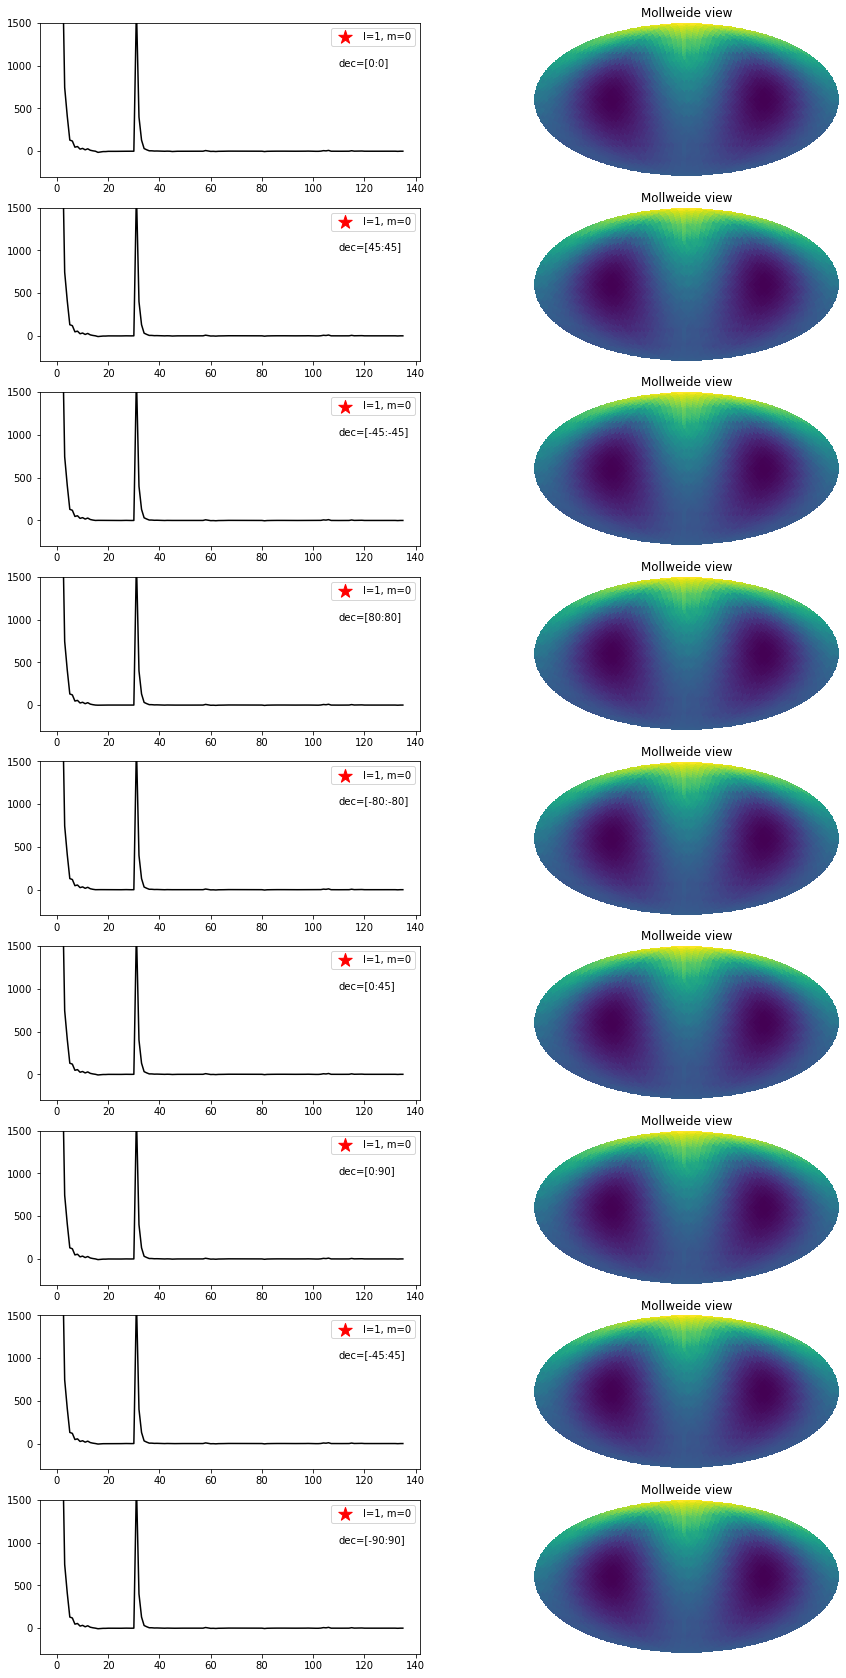

In [198]:
import warnings
warnings.filterwarnings('ignore')

#fmt: [orbdec0, orbdec1, axrotPerOrb]
fig, ax = plt.subplots(9, 2, figsize=(15, 30))
trial_orbits = [[0, 0], [45, 45], [-45, -45], [80, 80], [-80, -80],
               [0, 45], [0, 90], [-45, 45], [-90, 90]]
i = 0
for trial_orbit in trial_orbits:
    orbit = compute_orbit(orbdec0=trial_orbit[0], orbdec1=trial_orbit[1])
    B = compute_B('21chic/beammap_t_40.fits', orbit)
    realcorrs, imagcorrs = compute_corr(B)
    ax[i][0].plot(realcorrs, color='black')
    ax[i][0].scatter(1, realcorrs[1], color='red', marker='*', s=200, label='l=1, m=0')
    ax[i][0].text(110, 1000, f'dec=[{trial_orbit[0]}:{trial_orbit[1]}]')
    ax[i][0].set_ylim(-300, 1500)
    ax[i][0].legend()
    
    plt.axes(ax[i][1]) #visualize the telescope beam path
    skycov = sky_coverage('21chic/beammap_t_40.fits', orbit)
    hp.mollview(skycov/np.max(skycov), hold=True, min=0, max=1, cbar=False)
    i += 1
fig.savefig('out.pdf')

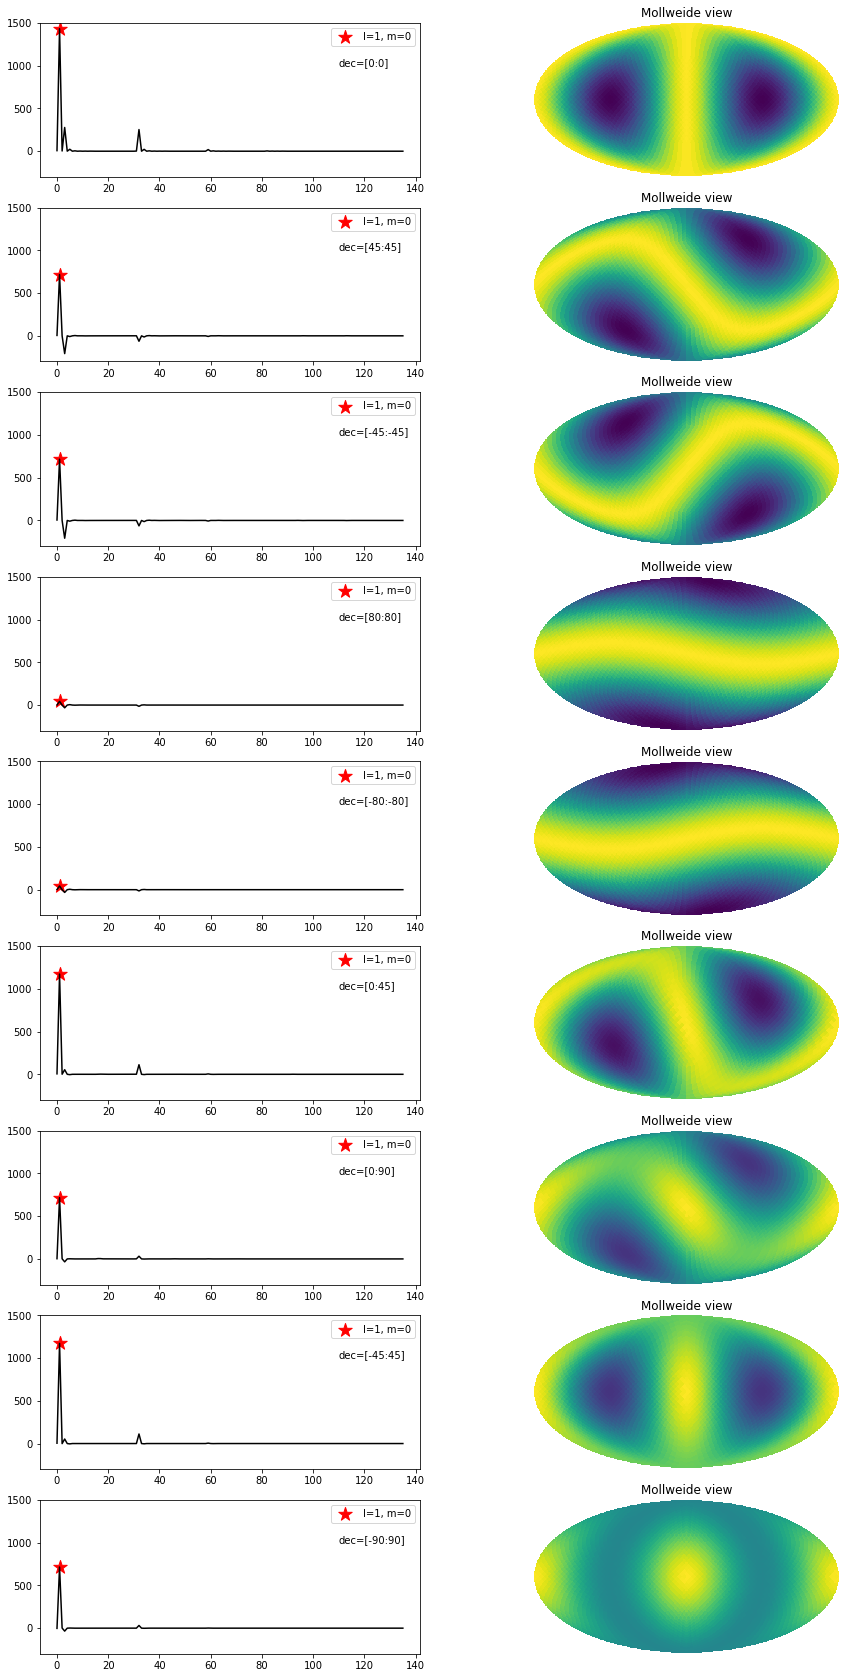

In [152]:
import warnings
warnings.filterwarnings('ignore')

#fmt: [orbdec0, orbdec1, axrotPerOrb]
fig, ax = plt.subplots(9, 2, figsize=(15, 30))
trial_orbits = [[0, 0], [45, 45], [-45, -45], [80, 80], [-80, -80],
               [0, 45], [0, 90], [-45, 45], [-90, 90]]
i = 0
for trial_orbit in trial_orbits:
    orbit = compute_orbit(orbdec0=trial_orbit[0], orbdec1=trial_orbit[1])
    B = compute_B('21chic/beammap_t_40.fits', orbit)
    realcorrs, imagcorrs = compute_corr(B)
    ax[i][0].plot(realcorrs, color='black')
    ax[i][0].scatter(1, realcorrs[1], color='red', marker='*', s=200, label='l=1, m=0')
    ax[i][0].text(110, 1000, f'dec=[{trial_orbit[0]}:{trial_orbit[1]}]')
    ax[i][0].set_ylim(-300, 1500)
    ax[i][0].legend()
    
    plt.axes(ax[i][1]) #visualize the telescope beam path
    skycov = sky_coverage('21chic/beammap_t_40.fits', orbit)
    hp.mollview(skycov/np.max(skycov), hold=True, min=0, max=1, cbar=False)
    i += 1
fig.savefig('out.pdf')